# sentinelRequest

sentinelRequest can be used to colocate a geodataframe (ie areas, trajectories, buoys, etc ...) with sentinel (1, but also 2 , 3 : all known by scihub)

## Install
```
% pip install git+https://gitlab.ifremer.fr/sarwing/sentinelrequest.git
```

## CLI usage

In [25]:
!sentinelRequest --help

usage: sentinelRequest [-h] [--user USER] [--password PASSWORD] [--date DATE]
                       [--wkt WKT] [--filename FILENAME] [--query QUERY]
                       [--datatake] [--dateformat DATEFORMAT] [--dtime DTIME]
                       [--cachedir CACHEDIR]
                       [--cacherefreshrecent CACHEREFRESHRECENT] [--cols COLS]
                       [--outfile OUTFILE] [--outfile_format OUTFILE_FORMAT]
                       [--show]

Requests SAFE list from scihub

optional arguments:
  -h, --help            show this help message and exit
  --user USER           scihub login
  --password PASSWORD   scihub password
  --date DATE           date as string. if provided 2 time, first is start,
                        last is stop
  --wkt WKT             wkt representation of the region of interest
  --filename FILENAME   filename, with joker. ex 'S1?_?W_GRD*'. default to S1*
  --query QUERY         additionnal query. for exemple
                        'orbitdirect

## API usage

In [23]:
%matplotlib inline
import geopandas as gpd
from sentinelRequest import scihubQuery_new as scihubQuery
import datetime
import matplotlib.pyplot as plt
import shapely.wkt as wkt

# get your own credential from  https://scihub.copernicus.eu/dhus
import pickle
user,password = pickle.load(open("credential.pkl","rb"))

## user request as a geodataframe
As an example, two area are defined, that overlap in time and area

In [2]:
gdf = gpd.GeoDataFrame({
        "beginposition" : [ datetime.datetime(2018,10,13,0) , datetime.datetime(2018,10,13,6) ],
        "endposition"   : [ datetime.datetime(2018,10,13,18) , datetime.datetime(2018,10,13,21) ],
        "geometry"      : [ wkt.loads("POINT (-5 45)").buffer(5) , wkt.loads("POLYGON ((-12 35, -3 35, -3 45, -12 45, -12 35))")]    
    },index=["area1","area2"])
gdf

,beginposition,endposition,geometry
area1,2018-10-13 00:00:00,2018-10-13 18:00:00,"POLYGON ((0.00000 45.00000, -0.02408 44.50991,..."
area2,2018-10-13 06:00:00,2018-10-13 21:00:00,"POLYGON ((-12.00000 35.00000, -3.00000 35.0000..."


INFO:sentinelRequest:from 2018-10-13 00:00:00 to 2018-10-13 21:00:00 : 12 SAFES


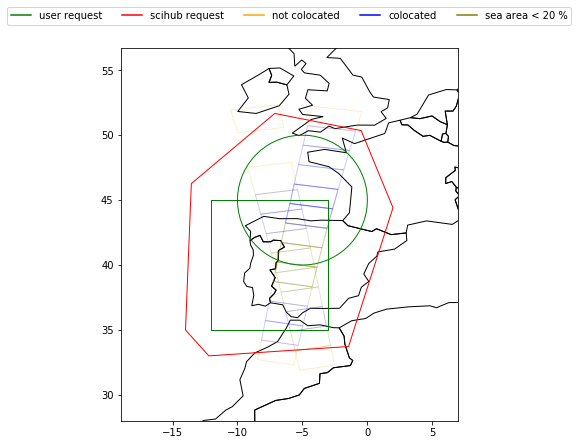

In [24]:
fig = plt.figure(figsize=(10,7))
safes = scihubQuery(
        gdf=gdf,
        min_sea_percent=20, 
        user=user,
        password=password,
        filename='S1?_?W_GRD*.SAFE',
        cachedir='/home1/scratch/oarcher/scihub_cache',
        fig=fig)


The two user area (green) are merged into a simpliest big one (red), but a colocalization with user area is done , to deselect some safes (in yellow ).

One can notice that there is a not colocated safe (yellow) in the circular area (area2) : it's because, it's not time colocated.

Green safe are safe over land (min_sea_percent).



The result is a geodataframe with most information from scihub:

In [5]:
safes.iloc[0]

acquisitiontype                                                      NOMINAL
beginposition                                     2018-10-13 06:22:57.315000
endposition                                       2018-10-13 06:23:22.315000
filename                   S1B_IW_GRDH_1SDV_20181013T062257_20181013T0623...
footprint                  POLYGON ((-1.371217 48.818211, -4.953517 49.22...
format                                                                  SAFE
gmlfootprint               <gml:Polygon srsName="http://www.opengis.net/g...
identifier                 S1B_IW_GRDH_1SDV_20181013T062257_20181013T0623...
ingestiondate                                     2018-10-13 10:00:40.688000
instrumentname                             Synthetic Aperture Radar (C-band)
instrumentshortname                                                SAR-C SAR
lastorbitnumber                                                        13130
lastrelativeorbitnumber                                                  154

Index from original request are preserved, so it's easy to know the area that belong to a safe

In [21]:
safes.loc['area1']

,acquisitiontype,beginposition,endposition,filename,footprint,format,gmlfootprint,identifier,ingestiondate,instrumentname,...,sensoroperationalmode,size,slicenumber,status,swathidentifier,url,url_alternative,url_icon,uuid,timeliness
area1,NOMINAL,2018-10-13 06:22:57.315,2018-10-13 06:23:22.315,S1B_IW_GRDH_1SDV_20181013T062257_20181013T0623...,"POLYGON ((-1.371217 48.818211, -4.953517 49.22...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062257_20181013T0623...,2018-10-13 10:00:40.688,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,16,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ffac5e34-2e15-4238-9bd9-6bd0c1d6ca89,Fast-24h
area1,NOMINAL,2018-10-13 06:23:22.317,2018-10-13 06:23:47.315,S1B_IW_GRDH_1SDV_20181013T062322_20181013T0623...,"POLYGON ((-1.820918 47.322227, -5.29902 47.732...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062322_20181013T0623...,2018-10-13 10:03:18.469,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,17,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,fbfee557-21ac-43d8-8057-71f40895a199,Fast-24h
area1,NOMINAL,2018-10-13 06:23:47.316,2018-10-13 06:24:12.314,S1B_IW_GRDH_1SDV_20181013T062347_20181013T0624...,"POLYGON ((-2.254533 45.824997, -5.636228 46.23...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062347_20181013T0624...,2018-10-13 10:00:43.034,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,18,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,b69f2996-bd94-4f57-a4d9-3e1a307ccff2,Fast-24h
area1,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.674236 44.326656, -5.966702 44.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd,Fast-24h
area1,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.829861, -6.308844 43.238...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef,Fast-24h


Some safe are in both area:

In [20]:
safes[safes.duplicated(['filename'],keep=False)]

,acquisitiontype,beginposition,endposition,filename,footprint,format,gmlfootprint,identifier,ingestiondate,instrumentname,...,sensoroperationalmode,size,slicenumber,status,swathidentifier,url,url_alternative,url_icon,uuid,timeliness
area1,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.674236 44.326656, -5.966702 44.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd,Fast-24h
area2,NOMINAL,2018-10-13 06:24:12.316,2018-10-13 06:24:37.314,S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,"POLYGON ((-2.674236 44.326656, -5.966702 44.73...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062412_20181013T0624...,2018-10-13 10:00:43.891,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,19,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,6244c5a5-cf83-4f27-90c4-e9b2e17c39dd,Fast-24h
area1,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.829861, -6.308844 43.238...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef,Fast-24h
area2,NOMINAL,2018-10-13 06:24:37.315,2018-10-13 06:25:02.315,S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,"POLYGON ((-3.10039 42.829861, -6.308844 43.238...",SAFE,"<gml:Polygon srsName=""http://www.opengis.net/g...",S1B_IW_GRDH_1SDV_20181013T062437_20181013T0625...,2018-10-13 10:02:56.026,Synthetic Aperture Radar (C-band),...,IW,1.65 GB,20,ARCHIVED,IW,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,ea30fb07-13c8-49eb-b4c3-9f490b92fdef,Fast-24h
